# Parcial 2

Nombre: Mariana Toro Escobar

CC: 1004776769

In [1]:
import numpy as np
from scipy import integrate
import scipy.optimize as optimize
import pandas as pd
import matplotlib.pylab as plt

A) Los siguientes datos fueron extraidos de un [perfil real de Instragram](https://www.instagram.com/paulacano24/):

https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json

Interprete los datos como un problema de caida libre y a partir del ajuste (fit) a la correspondiente ecuación de movimiento, determine
1. La velocidad inicial de incremento de seguidores en `followers/hour`
1. La aceleración constante en `followers/hour**2`
1. El número máximo de seguidores que alcanzaría el perfil
1. La fecha en la que se alcanzaría dicho máximo

B) El período de  un pendulo de longitud $l$ oscilando a ángulos grandes  $\alpha$, está dado por
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
donde
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
es el período del mismo péndulo a pequeñas amplitudes. Culquier intento de evaluación numérico de esa integral debería fallar. Sin embargo, si hacemos el cambio de variable
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
obtenemos
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
que corresponde a una integral bien comportada. 
1. Escriba un programa que use la anterio integral para calcular el cociente  $T/T_0$ para ángulos enteros (en grados) $0^\circ \le\alpha \le 90^\circ$.  
1. Genere un DataFrame de pandas que contenga como columnas: la amplitud en grados, la amplitud en radianes, y el cociente $T/T_0$, 
1. Haga un gráfico de $T/T_0$ como función de $\alpha$ (en grados). 
1. Explain the result when $\alpha = 0.$ 

# **Solución:**

# A)

1.

El polinomio es: 
            2
-0.002438 x + 8.552 x + 4.276e+04
42761.086011014246


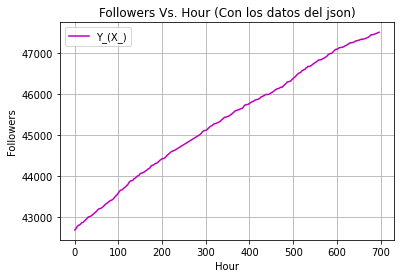

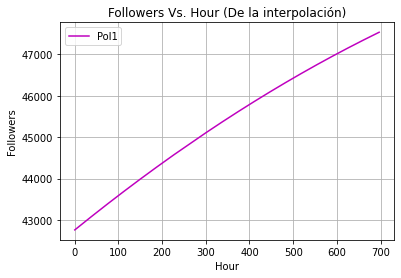

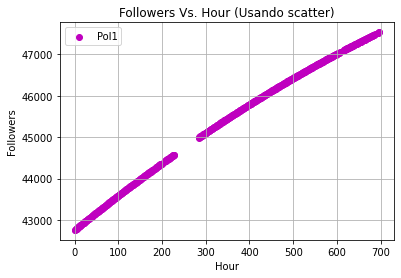

In [2]:
"""
  Velocidad inicial de incremento de seguidores (followers/hour).
"""

# Lectura del archivo json
df = pd.read_json("https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/Followers.json")

# Extraer los conjuntos de datos para X y Y
X_ = df['hours']
Y_ = df['followers']

# Construir el polinomio
# Interpolación de los datos
coef = np.polyfit(X_, Y_, 2)
# Convertir la interpolación a una función
pol1 = np.poly1d(coef)
print("El polinomio es: \n", pol1)
# Evaluando el polinomio 
print(pol1(X_)[0])

#Gráfica
plt.figure()
plt.plot(X_, Y_, color="m", label = "Y_(X_)")
plt.title("Followers Vs. Hour (Con los datos del json)")
plt.ylabel("Followers")
plt.xlabel("Hour")
plt.grid()
plt.legend()
plt.show()

plt.figure()
plt.plot(X_, pol1(X_), color="m", label = "Pol1")
plt.title("Followers Vs. Hour (De la interpolación)")
plt.ylabel("Followers")
plt.xlabel("Hour")
plt.grid()
plt.legend()
plt.show()



#Gráfica usando scatter 
plt.figure()
plt.scatter(X_, pol1(X_), color="m", label = "Pol1")
plt.title("Followers Vs. Hour (Usando scatter)")
plt.ylabel("Followers")
plt.xlabel("Hour")
plt.grid()
plt.legend()
plt.show()


In [3]:
from scipy import misc
# Código para definir derivate
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

# Velocidad inicial
# Derivando el polinomio
v0 = derivate(pol1, X_[0])
print("La velocidad inicial es:", v0, "followers/hour")
print("Y con base en el polinomio de la interpolación, el coeficiente de x es: 8.552")

La velocidad inicial es: 8.552137792663416 followers/hour
Y con base en el polinomio de la interpolación, el coeficiente de x es: 8.552


**2.**

In [4]:
"""
  La aceleración constante (followers/hour**2).
"""

# Aceleración constante
# Hallando la segunda derivada del polinomio
a = derivate(pol1, X_[0], n=2, order=3)
print("La aceleración es:", a/2, "followers/hour**2")
print("Y con base en el polinomio de la interpolación, el coeficiente de x^2 es: -0.002438")

La aceleración es: -0.0024376271903747693 followers/hour**2
Y con base en el polinomio de la interpolación, el coeficiente de x^2 es: -0.002438


**3.**

In [5]:
"""
  El número máximo de seguidores que alcanzaría el perfil.
"""

# Hallar el máximo 
fp = optimize.fmin_powell(-pol1, 0.1, ftol=1E-7)
max = int(abs(pol1(fp)))
print("El número máximo de seguidores que alcanzará es:", max)

Optimization terminated successfully.
         Current function value: -50262.136729
         Iterations: 2
         Function evaluations: 27
El número máximo de seguidores que alcanzará es: 50262


**4.**

In [6]:
"""
  Fecha en la que se alcanzaría dicho máximo.
"""

# Hallar el día y la hora
import datetime as dt
h_ = float(fp)
fecham = df["date_time"][0] + dt.timedelta(hours = h_)
print("La fecha en que alcanzará el máximo es:", fecham)

La fecha en que alcanzará el máximo es: 2021-10-17 00:18:28.966848


# B)

**1.** Para hallar la relación $T/T_{0}$ se considera la siguiente expresión:

$$
\frac{T}{T_{0}}=\frac{2}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}} \ \ \ \ \ (*)
$$ 

In [7]:
"""
  Cálculo de la integral.
"""

# Límites de integración
a = 0
b = np.pi/2
# Definición del intervalo
x_ = np.linspace(0, np.pi/2, 100)
# Definición de la función calculando la integral por el método de la cuadratura
f0 = lambda α: integrate.quad(lambda ϕ: 1/np.sqrt(1-np.sin(α/2)**2*np.sin(ϕ)**2), 0, np.pi/2)[0]
print(f0)

# Definición de la función dependiente de t usando try and except
def Si(t):
    try:
      # Vectorización de la función para obtener un arreglo
        n_=np.array(t).shape[0]
        f=np.vectorize(f0)
    except IndexError:
      # Aprovechar el IndexError para evaluar la función como se definió inicialmente
        f=f0
      # Retornar el valor de la integral multiplicado por el factor de la expresión escrita inicialmente, para obtener la relación T/T_0
    return f(t)*2/np.pi
print("Para la relación T/T_0 se obtienen los siguientes valores:", Si(x_))

<function <lambda> at 0x7fc48905d950>
Para la relación T/T_0 se obtienen los siguientes valores: [1.         1.00001573 1.00006294 1.00014163 1.00025181 1.0003935
 1.00056673 1.00077153 1.00100793 1.00127597 1.00157571 1.00190719
 1.00227047 1.00266561 1.00309268 1.00355177 1.00404293 1.00456628
 1.00512189 1.00570986 1.0063303  1.00698332 1.00766903 1.00838755
 1.00913901 1.00992355 1.01074131 1.01159243 1.01247707 1.01339538
 1.01434753 1.0153337  1.01635406 1.0174088  1.01849811 1.0196222
 1.02078127 1.02197553 1.02320522 1.02447055 1.02577177 1.02710911
 1.02848285 1.02989323 1.03134052 1.03282501 1.03434697 1.03590671
 1.03750453 1.03914074 1.04081567 1.04252964 1.04428299 1.04607609
 1.04790929 1.04978296 1.05169749 1.05365326 1.05565069 1.05769018
 1.05977217 1.0618971  1.06406541 1.06627758 1.06853407 1.07083538
 1.07318201 1.07557448 1.07801332 1.08049907 1.08303231 1.0856136
 1.08824354 1.09092274 1.09365182 1.09643144 1.09926224 1.10214491
 1.10508015 1.10806868 1.11111124 1

**2.**

In [8]:
"""
  DataFrame con amplitud en grados, radiantes y con el cociente T/T_0.
"""

# Definición del DataFrame
# Convertir α en grados
x_1 = x_*180/np.pi

df = pd.DataFrame({"α en rad":x_, "α en °":x_1, "Relación T/T0":Si(x_)})
df

,α en rad,α en °,Relación T/T0
0,0.000000,0.000000,1.000000
1,0.015867,0.909091,1.000016
2,0.031733,1.818182,1.000063
3,0.047600,2.727273,1.000142
4,0.063467,3.636364,1.000252
...,...,...,...
95,1.507330,86.363636,1.163806
96,1.523196,87.272727,1.167832
97,1.539063,88.181818,1.171930
98,1.554930,89.090909,1.176099


**3.**

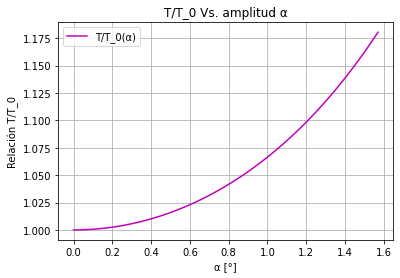

In [9]:
"""
  Gráfica de la relación T/T_0.
"""

plt.figure()
plt.plot(df["α en rad"], df["Relación T/T0"], color="m", label = "T/T_0(α)" )
plt.title("T/T_0 Vs. amplitud α")
plt.ylabel("Relación T/T_0")
plt.xlabel("α [°]")
plt.grid()
plt.legend()
plt.show()

**4.** Cuando $\alpha = 0$,  la expresión definida en el punto 1 $(*) \to 1$.

Eso implica que la amplitud del péndulo va disminuyendo, de manera que el periodo para $\alpha$ grandes $T$, se aproxima a $T_{0}$.

Así, como $T \to T_{0}$ entonces, $\frac{T}{T_{0}} = 1$.

